# Laboratorio di Simulazione Numerica

## Esercitazione 4 

In questa esercitazione vogliamo eseguire simulazioni su un campione di materia, in diverse condizioni di temperatura e stati di aggregazione, per estrapolarne medie di insieme tipiche della meccanica statistica. Il sistema su cui ci concentreremo sarà l'**ensamble micro-canonico**, ossia quell'insieme di sistemi statistici che seguono il postulato di **equi-probabilità a priori**. Questo assume che la distribuzione di probabilità nello spazio delle fasi del sistema sia costante: da questo postulato derivano insiemi fisici di **sistemi che ad ogni tempo sono uniformemente distribuiti su tutti i possibili microstati**. L'ensamble micro-canonico è dunque quell'insieme in cui ogni membro ha probabilità uguale di essere in uno dei possibili stati microscopici. 

### Esercizio 4.1 

Lo scopo di questo esercizio è di apportare delle modifiche al codice **Molecular_Dynamics_NVE** fornitoci in laboratorio, il quale, sfruttando l'algoritmo di Verlet, esegue simulazioni del moto di molecole in diverse fasi della materia. Esso prende in input vari parametri (temperatura, numero di particelle, densità, raggio di azione del potenziale, intervallo di tempo fra un passo dell'algoritmo e il successivo, numero di passi da eseguire, ogni quanti passi stampare i risultati, numero di blocchi) ed esegue vari calcoli per restituire i valori di **energia totale, energia cinetica, energia potenziale e temperatura**. Esso permette inoltre di stampare le posizioni delle molecole nello spazio 3D, per poter visualizzare il moto del sistema tramite software appositi come Ovito.

Per estrapolare queste informazioni dal sistema è necessario eseguire una simulazione del moto delle molecole del campione, risolvendo in maniera esatta le equazioni di Newton. Questa è una task di notevole difficoltà, data soprattutto dall'elevato numero di gradi di libertà in gioco. Per semplificare il compito, immaginiamo che il nostro campione sia **infinito e periodico**, e lo suddividiamo in **celle cubiche di lato da fissare**. Ognuna delle celle in cui dividiamo il campione è **identica alle altre e si ripete uguale a se stessa nello spazio**. A questo punto, eseguiamo la simulazione solo all'interno di una di queste celle. Dalla condizione di periodicità si ha che ogni qual volta una particella dovesse uscire dal box della simulazione, ce ne sarà una "identica" (cioè con stessa velocità e accelerazione) che entra nel box dal lato opposto. Per simulare questa condizione fittizia di periodicità del campione utilizziamo le **condizioni periodiche al contorno**. Queste fanno in modo che, quando calcoliamo la distanza fra due molecole, il codice restituisca sempre la distanza fra le **immagini più vicine** delle due molecole all'interno del nostro reticolo infinito e periodico.

Il codice legge una configurazione iniziale delle molecole, salvata nel file "config.0" ed esegue la simulazione a partire da questa. L'algoritmo di Verlet, tuttavia, calcola il moto delle molecole del sistema a partire da **due configurazioni iniziali**, la prima al tempo $t_0$ e la seconda al tempo $t_0 - dt$. Nella versione iniziale il codice legge solo la configurazione al tempo $t_0$ e crea una configurazione fittizia per il tempo $t_0 - dt$, generando velocità randomiche nel cubo. Questo provoca un funzionamento non corretto della simulazione, in quanto in questo modo la temperatura non si mantiene al valore desiderato ma tende ad oscillare intorno ad altri valori. Questo è dovuto al fatto che nella realtà le velocità non sono distribuite in modo randomico, ma seguono distribuzioni diverse (ad esempio la distribuzione di Maxwell - Boltzmann per un gas perfetto). 

Il primo compito dell'esercitazione, dunque, è di implementare nel codice la possibilità di eseguire una **ripartenza**, ossia di salvare non solo la configurazione finale raggiunta dal sistema al tempo $t_f$, ma anche quella al tempo $t_f - dt$. Entrambe le configurazioni verranno poi fornite al codice per eseguire una nuova simulazione, la quale non dovrà più generare velocità iniziali randomiche, ma potrà calcolarle a partire dalle due configurazioni fornite in input. Sarà in questo modo possibile usare l'algoritmo di Verlet fin dal primo passo della simulazione. 

Tale ripartenza viene implementata con l'aggiunta di una variabile booleana all'interno del file di input (che si chiama "input.0"). Ci sono due possibilità:

- **booleano = false** (e.g. 0): il codice esegue una **"partenza da zero"**, cioè genera velocità iniziali in modo randomico e una volta arrivato alla fine salva la configurazione al tempo finale $t_f$ nel file "config.final" e la configurazione al tempo $t_f - dt$ nel file "old_config.final"
- **booleano = true** (e.g. 1): il codice esegue una **"ripartenza"**, quindi legge le due configurazioni dai file "config.0" e "old_config.0", da queste calcola la velocità iniziale ed esegue la simulazione. 

Perchè il tutto funzioni è necessario anche implementare un metodo per riscalare le velocità iniziali in modo che queste coincidano con la temperatura alla quale si vuole effettuare la simulazione. 

Una volta fatte queste aggiunte al codice, è necessario ripetere più volte la simulazione, effettuando sempre ripartenze (tranne per la prima volta che si esegue il codice) fino a quando il sistema termodinamico non raggiunge l'equilibrio, ossia fino a quando i valori di temperatura non si stabilizzano intorno al valore desiderato. Quando si raggiunge questa condizione, è possibile salvare le configurazioni finali raggiunte, da utilizzare per le simulazioni degli esercizi successivi.

Di seguito mostriamo i grafici ottenuti per la temperatura al variare del tempo durante le diverse simulazioni. I risultati esposti sono mostrati in unità di Lennard-Jones e, per i diversi stadi della materia, si sono utilizzati i seguenti parametri: 

- **Fase Solida**: $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$
- **Fase Liquida**: $\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$
- **Fase Gassosa**: $\rho^\star = 00.5$, $T^\star = 1.2$, $r_c = 5.0$

In particolare, siamo interessati a vedere se la temperatura, dopo un certo numero di ripartenze, raggiunge una condizione di equilibrio al valore desiderato. Si segnala che si ha una nuova ripartenza dell'algoritmo ogni 1000 passi.

### Fase Solida

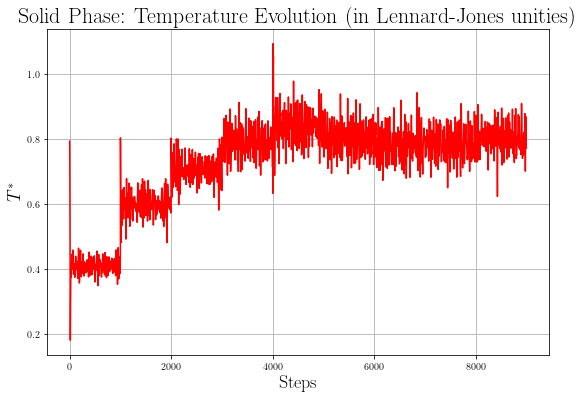

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

N = 9000
x1 = np.arange(N)
t = np.loadtxt("output_tempsolid.dat", unpack='true')

plt.figure(figsize=(9,6))
plt.plot(x1, t, c='r')
plt.xlabel('Steps', fontsize=18)
plt.ylabel('$T^*$', fontsize=18)
plt.title('Solid Phase: Temperature Evolution (in Lennard-Jones unities)', fontsize=22)
plt.grid(True)

plt.show();

Come si può vedere, dopo solo 4 ripartenze il sistema raggiunge la temperatura voluta. Le oscillazioni sono contenute entro le 0.1 unità intorno al valore di 0.8.

### Fase Liquida

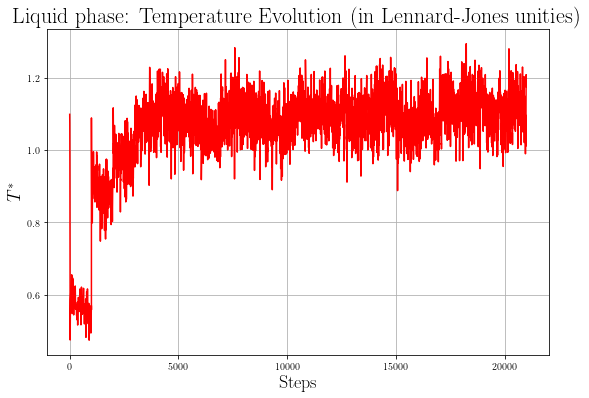

In [3]:
N = 21000
x1 = np.arange(N)
t = np.loadtxt("output_templiquid.dat", unpack='true')

plt.figure(figsize=(9,6))
plt.plot(x1, t, c='r')
plt.xlabel('Steps', fontsize=18)
plt.ylabel('$T^*$', fontsize=18)
plt.title('Liquid phase: Temperature Evolution (in Lennard-Jones unities)', fontsize=22)
plt.grid(True)


plt.show()

Anche nel caso della fase liquida si evidenzia una buona convergenza alla temperatura desiderata pari a 1.1. Tuttavia si segnala una notevole difficoltà: solo dopo 10 ripartenze la temperatura si stabilizza intorno al valore imposto, mantenendo oscillazioni di 0.1 unità.

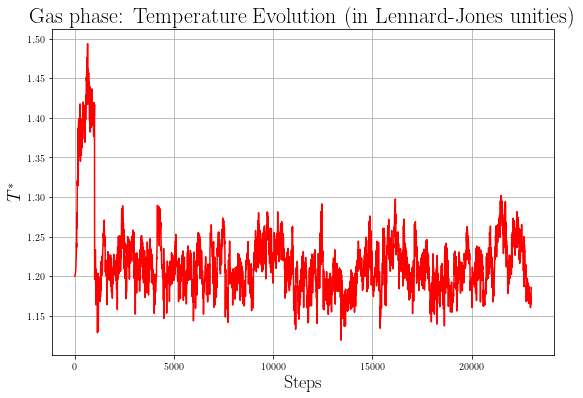

In [4]:
N = 23000
x1 = np.arange(N)
t = np.loadtxt("output_tempgas.dat", unpack='true')

plt.figure(figsize=(9,6))
plt.plot(x1, t, c='r')
plt.xlabel('Steps', fontsize=18)
plt.ylabel('$T^*$', fontsize=18)
plt.title('Gas phase: Temperature Evolution (in Lennard-Jones unities)', fontsize=22)
plt.grid(True)


plt.show()

In questo caso si segnala una forte oscillazione della temperatura, che raggiunge il valore di 1.2 come voluto, ma oscilla notevolmente, anche dopo 23000 passi, cioè 23 ripartenze. Un buon equilibrio è raggiunto abbastanza presto, già alla quinta simulazione, ma come è evidente fra una simulazione e la successiva ci sono spesso grandi differenze. Le oscillazioni rimangono comunque contenute, generalmente, entro le 0.05 unità.

### Esercizio 4.2 

Lo scopo di questo secondo esercizio è quello di implementare, nel codice migliorato Molecular_Dynamics_NVE, il data blocking. Si richiede quindi di dividere i $10^5$ passi eseguiti durante la simulazione dall'algoritmo di Verlet in 50 blocchi, con i quali calcolare gli errori statistici. Il codice deve fornire i valori istantanei di energia interna totale per particella, $E/N$, energia potenziale per particella, $U/N$, energia cinetica per particella, $K/N$, e temperatura, $T$, ciascuno con relativo errore.

Il codice così equipaggiato viene utilizzato per le simulazioni dell'esercizio 4.3

### Esercizio 4.3

Lo scopo dell'esercizio è di utilizzare il codice, opportunamente modificato, per eseguire simulazioni su un campione di **Argon** nelle tre diverse fasi della materia, e presentare i risultati in unità del Sistema Internazionale.

Le simulazioni sono state effettuate a partire dalle configurazioni equilibrate nelle simulazioni dell'esercizio 4.1. I parametri utilizzati per l'Argon sono i seguenti: $\sigma = 0.34 \: nm$, $\epsilon/k_B = 120 \: K$, $m=39.948 \: amu$. 

Di seguito si presentano i grafici con i risultati ottenuti.

#### Fase Solida

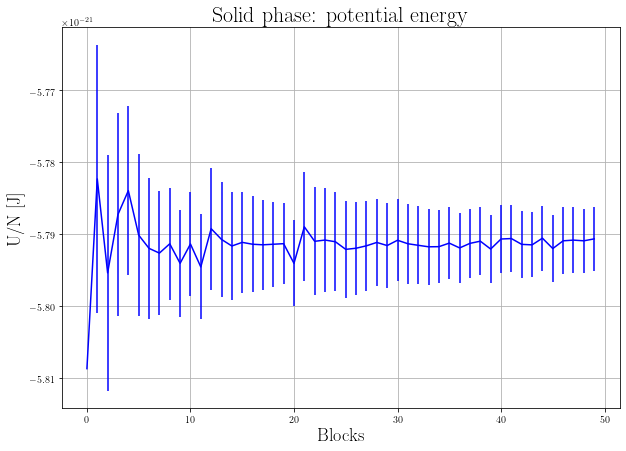

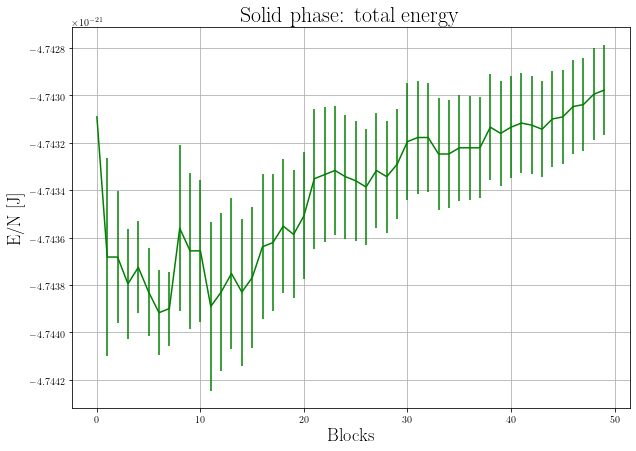

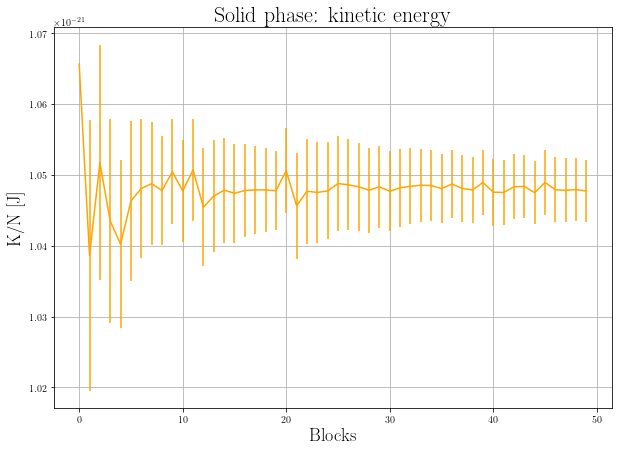

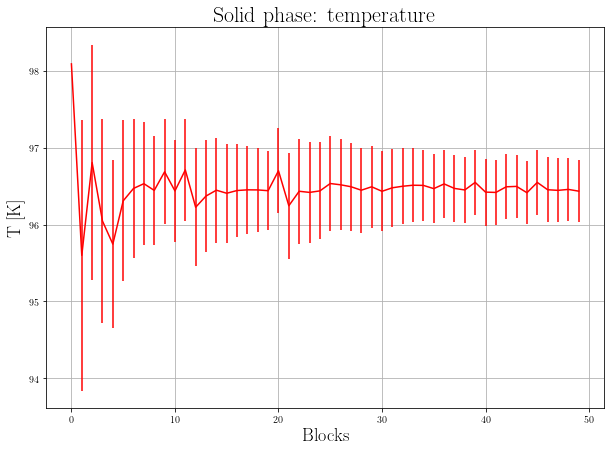

In [16]:
########################################### DATI ARGON ######################################################

sigma = 0.34 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule

#############################################################################################################

N = 50 #number of blocks

x1 = np.arange(N)
y = np.loadtxt("output_epot_ave1.dat", unpack='true')
errory = np.loadtxt("output_epot_error1.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x1, f_V*y, yerr=f_V*errory, c='b')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.title('Solid phase: potential energy', fontsize=22)
plt.grid(True)

x2 = np.arange(N)
z = np.loadtxt("output_etot_ave1.dat", unpack='true')
errorz = np.loadtxt("output_etot_error1.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x2, f_V*z, yerr=f_V*errorz, c='g')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)
plt.title('Solid phase: total energy', fontsize=22)
plt.grid(True)

x3 = np.arange(N)
w = np.loadtxt("output_ekin_ave1.dat", unpack='true')
errorw = np.loadtxt("output_ekin_error1.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x3, f_V*w, yerr=f_V*errorw, c='orange')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title('Solid phase: kinetic energy', fontsize=22)
plt.grid(True)

x4 = np.arange(N)
t = np.loadtxt("output_temp_ave1.dat", unpack='true')
errort = np.loadtxt("output_temp_error1.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x4, f_T*t, yerr=f_T*errort, c='r')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('T [K]', fontsize=18)
plt.title('Solid phase: temperature', fontsize=22)
plt.grid(True)

plt.show()

#### Fase Liquida

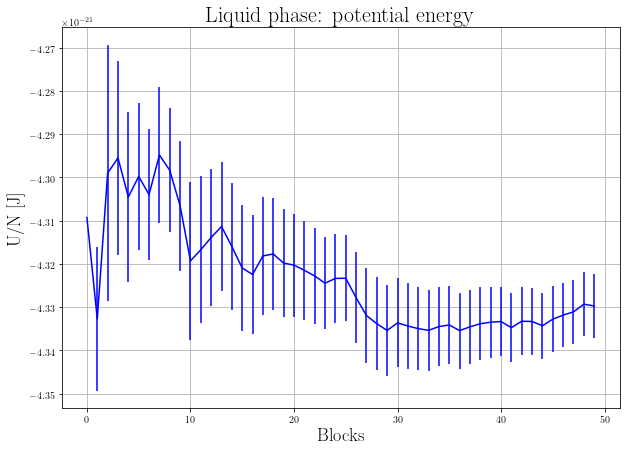

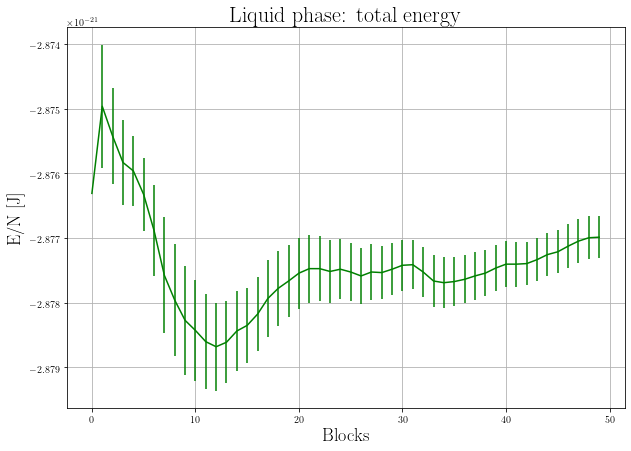

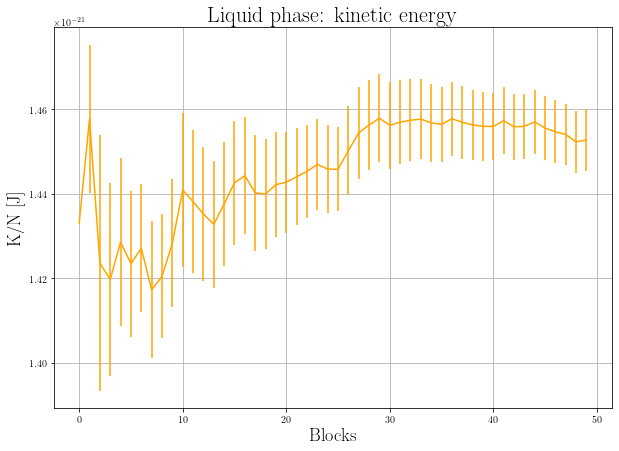

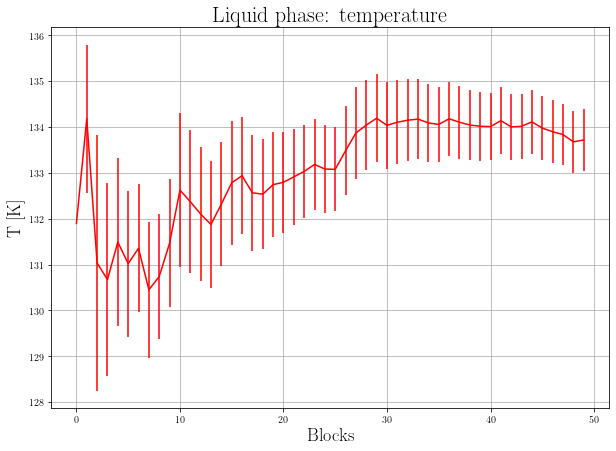

In [17]:
########################################### DATI ARGON ######################################################

sigma = 0.34 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule

#############################################################################################################

N = 50 #number of blocks

x1 = np.arange(N)
y = np.loadtxt("output_epot_aveliquid.dat", unpack='true')
errory = np.loadtxt("output_epot_errorliquid.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x1, f_V*y, yerr=f_V*errory, c='b')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.title('Liquid phase: potential energy', fontsize=22)
plt.grid(True)

x2 = np.arange(N)
z = np.loadtxt("output_etot_aveliquid.dat", unpack='true')
errorz = np.loadtxt("output_etot_errorliquid.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x2, f_V*z, yerr=f_V*errorz, c='g')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)
plt.title('Liquid phase: total energy', fontsize=22)
plt.grid(True)

x3 = np.arange(N)
w = np.loadtxt("output_ekin_aveliquid.dat", unpack='true')
errorw = np.loadtxt("output_ekin_errorliquid.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x3, f_V*w, yerr=f_V*errorw, c='orange')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title('Liquid phase: kinetic energy', fontsize=22)
plt.grid(True)

x4 = np.arange(N)
t = np.loadtxt("output_temp_aveliquid.dat", unpack='true')
errort = np.loadtxt("output_temp_errorliquid.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x4, f_T*t, yerr=f_T*errort, c='r')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('T [K]', fontsize=18)
plt.title('Liquid phase: temperature', fontsize=22)
plt.grid(True)

plt.show()

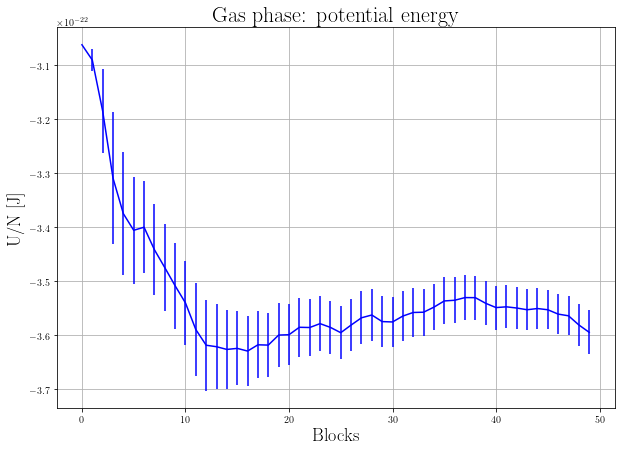

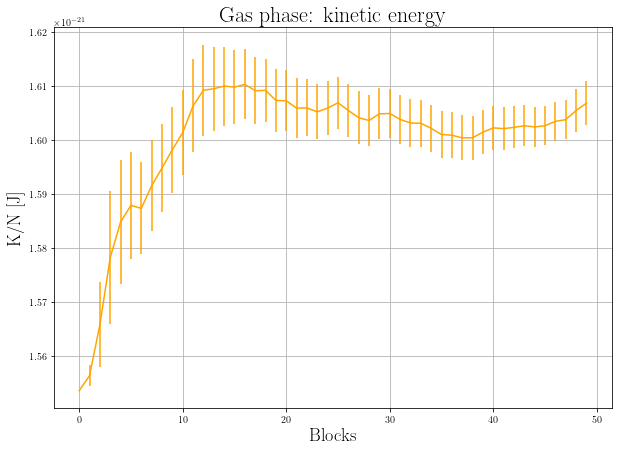

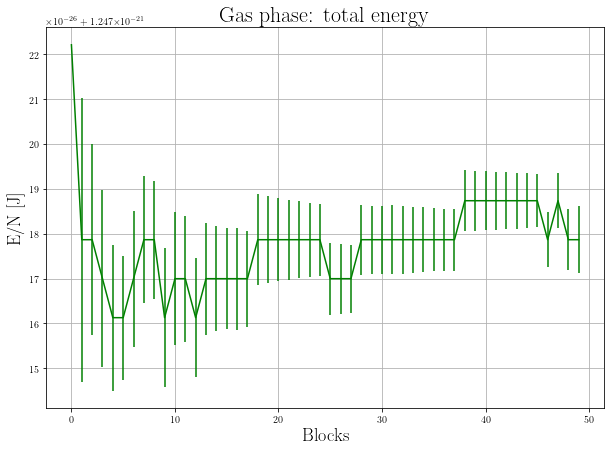

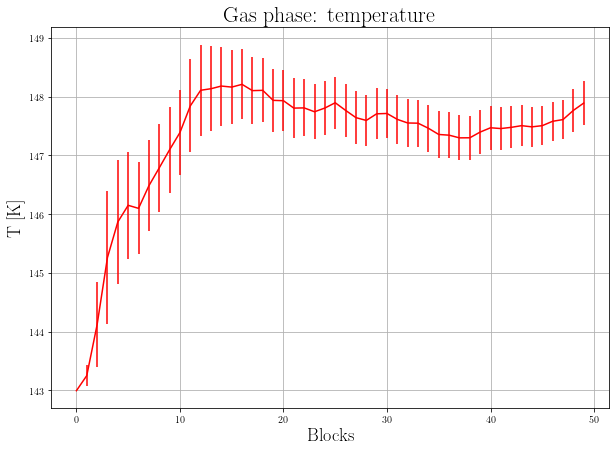

In [21]:
########################################### DATI ARGON ######################################################

sigma = 0.34e-9 #angstrom
f_T = 120. # fattore moltiplicativo temperatura in Kelvin
m = 39.948 #amu
f_V = 86.9156461925 * 10**(-23.) #fattore moltiplicativo dell'energia potenziale in Joule

#############################################################################################################

N = 50 #number of blocks

x1 = np.arange(N)
y = np.loadtxt("output_epot_avegas_new.dat", unpack='true')
errory = np.loadtxt("output_epot_errorgas_new.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x1, f_V*y, yerr=f_V*errory, c='b')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('U/N [J]', fontsize=18)
plt.title('Gas phase: potential energy', fontsize=22)
plt.grid(True)

x2 = np.arange(N)
z = np.loadtxt("output_etot_avegas_new.dat", unpack='true')
errorz = np.loadtxt("output_etot_errorgas_new.dat", unpack='true')

x3 = np.arange(N)
w = np.loadtxt("output_ekin_avegas_new.dat", unpack='true')
errorw = np.loadtxt("output_ekin_errorgas_new.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x3, f_V*w, yerr=f_V*errorw, c='orange')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('K/N [J]', fontsize=18)
plt.title('Gas phase: kinetic energy', fontsize=22)
plt.grid(True)

plt.figure(figsize=(10,7))
E = f_V*w + f_V*y
plt.errorbar(x2, f_V*z, yerr=f_V*errorz, c='g')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('E/N [J]', fontsize=18)
plt.title('Gas phase: total energy', fontsize=22)
plt.grid(True)

x4 = np.arange(N)
t = np.loadtxt("output_temp_avegas_new.dat", unpack='true')
errort = np.loadtxt("output_temp_errorgas_new.dat", unpack='true')

plt.figure(figsize=(10,7))
plt.errorbar(x4, f_T*t, yerr=f_T*errort, c='r')
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('T [K]', fontsize=18)
plt.title('Gas phase: temperature', fontsize=22)
plt.grid(True)

plt.show()

Si segnala un andamento particolarmente anomalo dell'energia totale, che potrebbe essere dovuto ad effetti di autocorrelazione dei dati all'interno dello stesso blocco. Per evitarli si è cercato di aumentare il numero di passi all'interno dei blocchi nella simulazione del gas, per la quale si sono utilizzati $5 \times 10^5$ steps per blocco. Tuttavia anche in questo modo l'andamento dell'energia rimane piuttosto singolare.